# Thư viện và các function cần thiết

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl

import map
import astar

In [2]:
# Vẽ kết quả
labels = ["0: passage", "1: wall", "2: start", "3: destinatiom", "4: path"]
palette = mpl.cm.inferno.resampled(len(labels)).colors
def show(arr):
    plt.figure(figsize=(9, 9))
    im = plt.imshow(palette[arr])
    # create a legend on the side
    patches = [mpatches.Patch(color=c, label=l) for c, l in zip(palette, labels)]
    plt.legend(handles=patches, bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0)
    plt.show()

# Khởi tạo bản đồ cho bài toán tìm đường

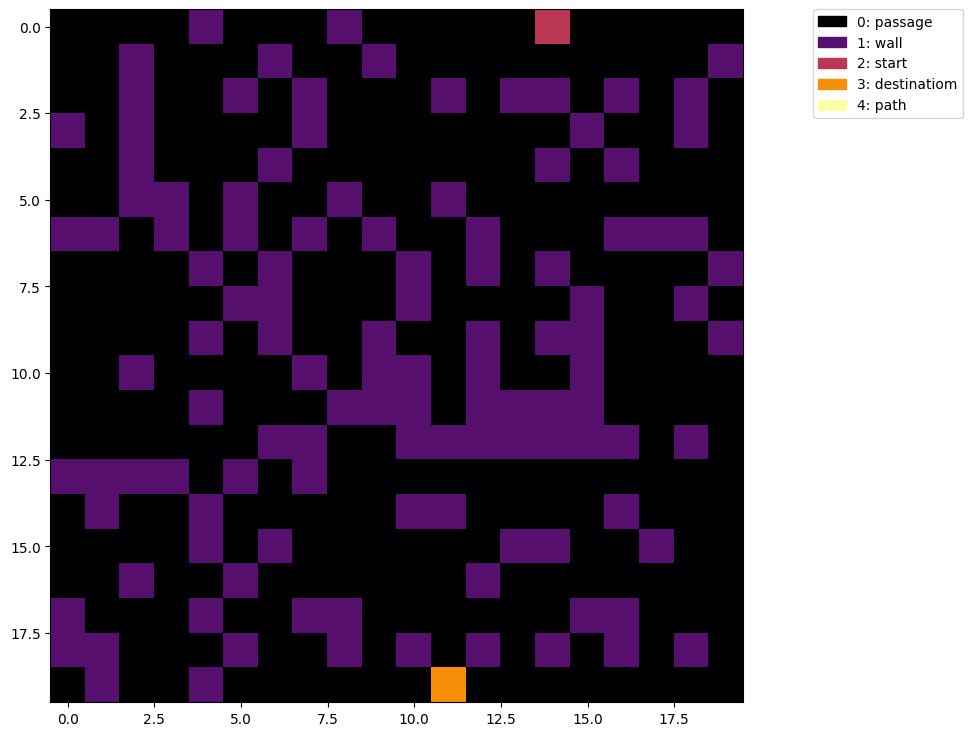

In [3]:
# Tạo map kích thước 20x20 tỉ lệ vật cản 30%
width = 20 
height = 20
wallrate = 0.3
map1 = map.Map(width, height)
map1.CreateWall(wallrate)
show(map1.grid)

# Tìm đường bằng giải thuật A*

In [4]:
move_directions = 4 # Di chuyển 4 hướng (lên xuống trái phải) hoặc 8 hướng
astar1 = astar.AStar(map1, move_directions)
astar1.Search()

The destination cell is found


The Path is 
-> (14, 0) -> (13, 0) -> (12, 0) -> (12, 1) -> (12, 2) -> (12, 3) -> (12, 4) -> (12, 5) -> (13, 5) -> (13, 6) -> (14, 6) -> (15, 6) -> (15, 7) -> (16, 7) -> (16, 8) -> (16, 9) -> (16, 10) -> (16, 11) -> (17, 11) -> (17, 12) -> (17, 13) -> (17, 14) -> (18, 14) -> (18, 15) -> (18, 16) -> (17, 16) -> (17, 17) -> (17, 18) -> (17, 19) -> (16, 19) -> (15, 19) -> (14, 19) -> (13, 19) -> (12, 19) -> (11, 19) 


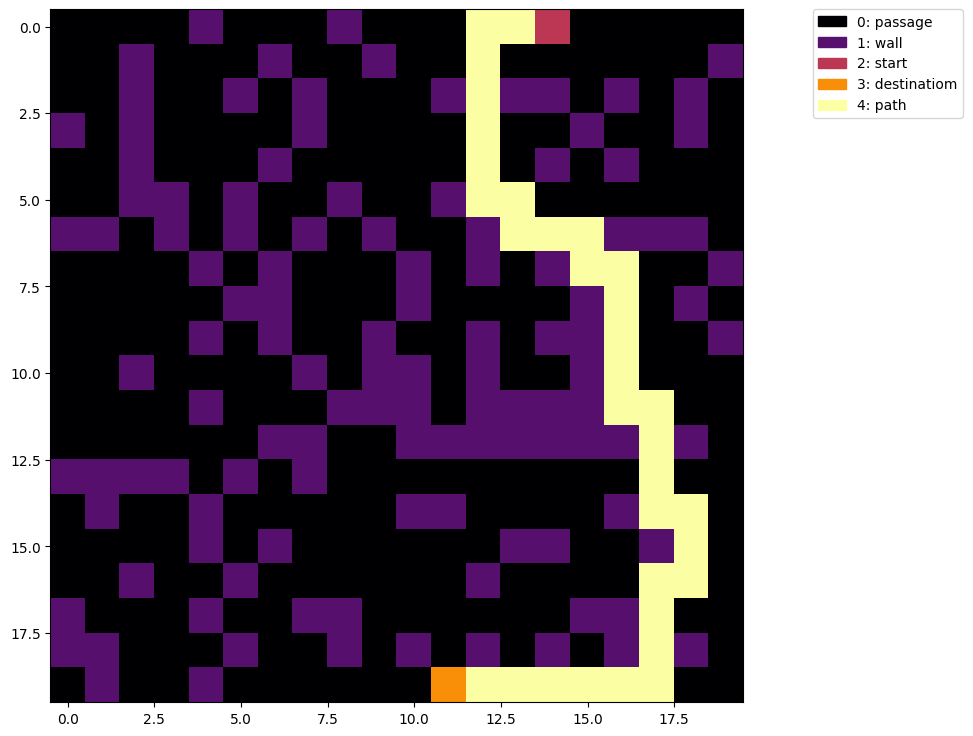

In [5]:
astar1.PrintPath() # In ra đường di chuyển
astar1.UpdateGrid() # Thêm đường di chuyển vào ma trận map
show(map1.grid)

# Nếu muốn dùng map tự thiết kế mà không phải Random

Đọc bản đồ thành công!
Kích thước: 20x20
Điểm bắt đầu: (7, 0)
Điểm đích: (3, 19)


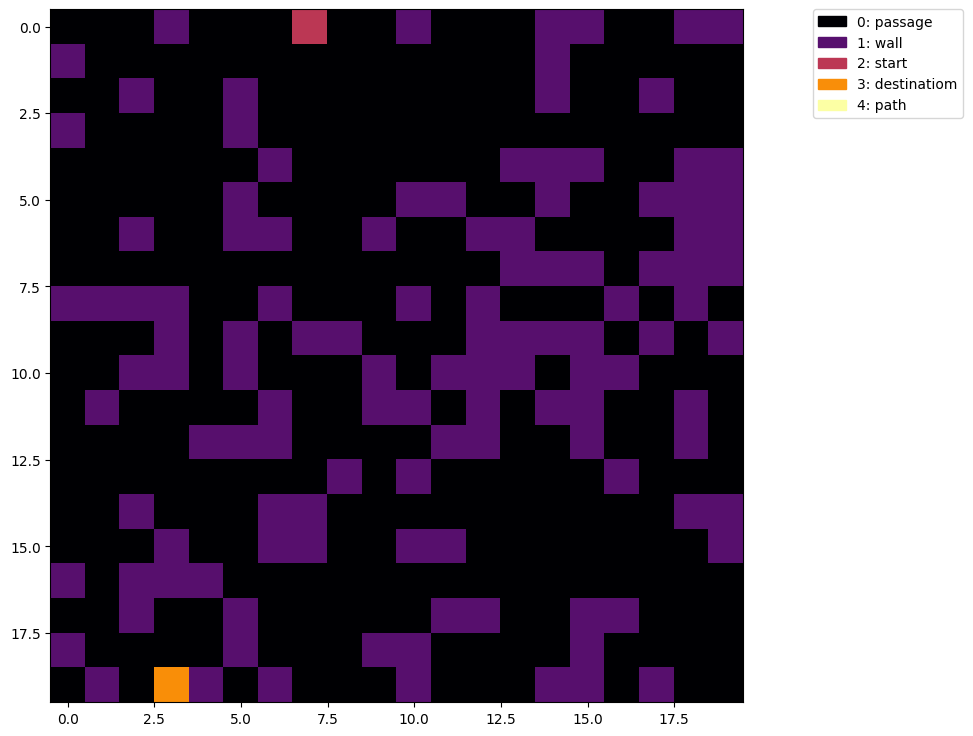

The destination cell is found


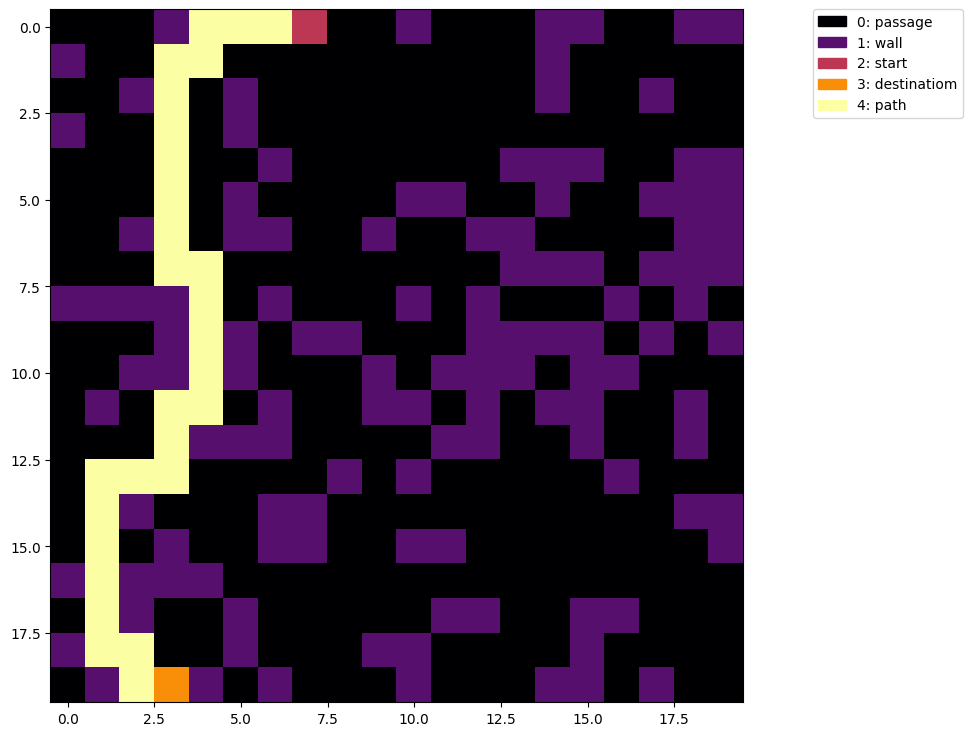

In [9]:
game_map = map.Map(1, 1)  # Khởi tạo với kích thước tạm thời 1x1
if game_map.load_from_file("map1.txt"):
    print("Đọc bản đồ thành công!")
    print(f"Kích thước: {game_map.width}x{game_map.height}")
    print(f"Điểm bắt đầu: {game_map.src_point}")
    print(f"Điểm đích: {game_map.des_point}")
    # game_map.src_point = (7,0)
    # Hiển thị bản đồ
    show(game_map.grid)
    
    # Tìm đường với thuật toán A*
    astar = astar.AStar(game_map, 4)  # 4 hướng di chuyển
    astar.Search()
    astar.UpdateGrid()
    
    # Hiển thị kết quả tìm đường
    show(game_map.grid)
else:
    print("Không thể đọc")